<a href="https://colab.research.google.com/github/vicpb/deep-learning-cnn-udemy/blob/main/CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install TensorFlow
!pip install -q tensorflow-gpu
import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 454.3MB 37kB/s 
2.5.0


In [2]:
# additional imports

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [3]:
# Load in the data

cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()


print("X train.shape: ", x_train.shape)
print("Y train.shape: ", y_train.shape)

170500096/170498071 [==============================] - 4s 0us/step
X train.shape:  (50000, 32, 32, 3)
Y train.shape:  (50000,)


In [4]:
# number os classes
K = len(set(y_train))
print("Number os classes: ", K)

Number os classes:  10


In [5]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [6]:
# Compile and fit
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 40s 25ms/step - loss: 1.5761 - accuracy: 0.4218 - val_loss: 1.2668 - val_accuracy: 0.5449
Epoch 2/15
1563/1563 [==============================] - 39s 25ms/step - loss: 1.2717 - accuracy: 0.5412 - val_loss: 1.1518 - val_accuracy: 0.5964
Epoch 3/15
1563/1563 [==============================] - 39s 25ms/step - loss: 1.1394 - accuracy: 0.5903 - val_loss: 1.0550 - val_accuracy: 0.6252
Epoch 4/15
1563/1563 [==============================] - 41s 26ms/step - loss: 1.0505 - accuracy: 0.6240 - val_loss: 1.0472 - val_accuracy: 0.6320
Epoch 5/15
1563/1563 [==============================] - 41s 26ms/step - loss: 0.9831 - accuracy: 0.6516 - val_loss: 0.9315 - val_accuracy: 0.6715
Epoch 6/15
1563/1563 [==============================] - 43s 27ms/step - loss: 0.9234 - accuracy: 0.6716 - val_loss: 0.8955 - val_accuracy: 0.6888
Epoch 7/15
1563/1563 [==============================] - 41s 26ms/step - loss: 0.8762 - accuracy: 0.6862 - val_loss: 0.8738 -

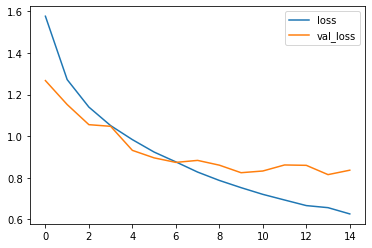

In [7]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

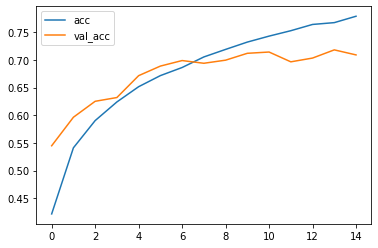

In [8]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[725  18  49  33  31  13  13  11  58  49]
 [ 19 773   6  20   3   9  13   4  22 131]
 [ 51   3 550 123 102  65  63  24   8  11]
 [ 15   4  37 593  55 199  52  25   6  14]
 [ 15   3  52  89 701  55  34  40   7   4]
 [  7   3  27 229  50 631  16  30   2   5]
 [  4   3  29  85  49  33 781   6   4   6]
 [ 10   1  20  73  84  67   6 725   2  12]
 [ 57  34  16  40  13   8   5   4 777  46]
 [ 29  57   9  22   8  10   6  12  13 834]]


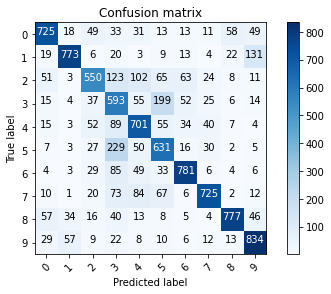

In [9]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization") 
  
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


In [11]:
# Label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Text(0.5, 1.0, 'True label: cat Predicted: horse')

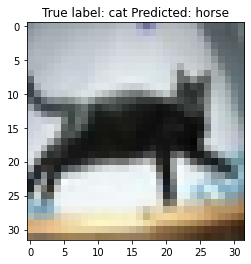

In [18]:
# Show some misclassified examples
# TODO: add label names
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))